**Using pure Numpy to build 3 layer neural network with Relu non linearity**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Prepare Data

In [2]:
# 3 Dimension non-linear input data

n = 200
d = 3
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[2, 1,-1],[3,0,-1],]).T
bias_true = np.array([0.5,0.1])

y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')


x: (200, 3), weights: (3, 2), bias: (2,), y: (200, 2)


In [3]:
# Let's use gradient descent to learn the weights and bias that minimizes the loss function.
# For this, we need the gradient of the loss function and the gradients of the linear function.

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient


class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    #output = (x ** 2) @ weights_true + x @ weights_true + bias_true
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

Adding non-linearity: Relu

In [4]:
# In order to learn non-linear functions, we need non-linearities in our model.

class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      # import pdb; pdb.set_trace()  # By the way, this is how you can debug
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient


relu = Relu()
input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


Train our new non linear model

In [5]:
class Model:
  def __init__(self, input_dim, num_hidden, output_dim):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu1 = Relu()
    self.relu2 = Relu()
    self.linear2 = Linear(num_hidden, output_dim)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r1 = self.relu1(l1)
    r2 = self.relu2(r1)
    l2 = self.linear2(r2)
    return l2
  
  def backward(self, output_gradient):
    linear2_gradient = self.linear2.backward(output_gradient)
    relu2_gradient = self.relu2.backward(linear2_gradient)
    relu1_gradient = self.relu1.backward(relu2_gradient)
    linear1_gradient = self.linear1.backward(relu1_gradient)
    # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
    # import pdb; pdb.set_trace()
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

loss = MSE()
model = Model(d, 10,output_dim=2)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
#plot_3d(x, y_true, y_pred)

5.003763876945117


array([[-6.95917760e-03,  7.30434581e-03, -1.02025136e-02],
       [-8.37026534e-03,  9.34352622e-03, -1.28524315e-02],
       [-1.27328123e-02, -5.90480473e-03,  4.19159184e-02],
       [-3.39737692e-02, -1.13448182e-02,  3.71314889e-02],
       [ 4.09935010e-04, -3.36740377e-03, -1.37222862e-02],
       [-8.90826470e-02, -1.00608399e-02,  9.52220765e-02],
       [ 5.27698373e-03, -2.48048027e-03, -1.76392894e-03],
       [-3.13282046e-02, -2.17176346e-02,  4.58049049e-02],
       [-2.04782839e-02, -1.32325183e-02,  3.06039511e-02],
       [-3.12122830e-03,  2.22292054e-04, -2.08597612e-05],
       [-5.94866916e-03,  7.09349520e-05,  3.73511346e-03],
       [-1.90575642e-03, -1.54679912e-03, -9.86753999e-03],
       [-4.45014026e-03, -4.29489261e-03,  2.38613252e-03],
       [ 1.89387782e-04,  2.68787084e-04, -3.01964171e-03],
       [-3.48834785e-02, -4.48451006e-03,  3.99197188e-02],
       [-3.20090080e-02,  3.94169136e-02, -2.76148531e-02],
       [-8.20022568e-02, -1.76382369e-02

In [6]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)


Initializing non-linear and loss for three dimensional data<br/>
3-d input and 2-d output with 2 hidden layers, 10 neurons for hidden layers

In [7]:

loss = MSE()
nonlinear = Model(3,20,2)
y_pred = nonlinear(x)
print(x.shape, weights_true.shape, y_true.shape, y_pred.shape)
print(loss(y_pred,y_true))

(200, 3) (3, 2) (200, 2) (200, 2)
6.20687044929248


In [8]:
fit(x, y_true, model=nonlinear, loss=loss, lr=0.1, num_epochs=400)
y_pred = nonlinear(x)

Epoch 0, loss 6.20687044929248
Epoch 1, loss 2.951294872265391
Epoch 2, loss 2.2209435554014036
Epoch 3, loss 1.7640727824438402
Epoch 4, loss 1.4221810093898812
Epoch 5, loss 1.1558947945731723
Epoch 6, loss 0.9535061060892376
Epoch 7, loss 0.8022790532929948
Epoch 8, loss 0.6919541687285587
Epoch 9, loss 0.6119866420819625
Epoch 10, loss 0.5513843674038781
Epoch 11, loss 0.5030489564003647
Epoch 12, loss 0.4618603110057689
Epoch 13, loss 0.4265159412485836
Epoch 14, loss 0.39552565505758436
Epoch 15, loss 0.3684073432329234
Epoch 16, loss 0.34420619610418113
Epoch 17, loss 0.32248723768825405
Epoch 18, loss 0.3029388997768607
Epoch 19, loss 0.2850069584079742
Epoch 20, loss 0.2683969511692595
Epoch 21, loss 0.2530975860939026
Epoch 22, loss 0.2388777612770936
Epoch 23, loss 0.22587057501683735
Epoch 24, loss 0.2139747832435246
Epoch 25, loss 0.2029353161494747
Epoch 26, loss 0.19274197229982154
Epoch 27, loss 0.1832146662264494
Epoch 28, loss 0.1739389503262956
Epoch 29, loss 0.16524

In [9]:
print(f'x: {x.shape}, y: {y_true.shape}, y1: {y_pred.shape}')
print(y_true)
print(y_pred)

x: (200, 3), y: (200, 2), y1: (200, 2)
[[ 1.07973095e+00  1.19687763e+00]
 [ 1.57191019e+00  1.72692753e+00]
 [-3.44981796e-01 -1.10735813e+00]
 [ 1.94943626e-01 -1.84459550e+00]
 [ 1.23972774e+00 -5.38983475e-01]
 [-2.08711058e+00 -2.53016108e+00]
 [ 6.36168971e-01  2.56123306e-01]
 [-6.81572220e-01 -1.27606171e+00]
 [-5.30626695e-01 -7.98735681e-01]
 [ 3.16070283e-01  7.19970394e-02]
 [ 3.10295024e-01  8.72523575e-02]
 [ 3.04192660e-01 -9.70262418e-02]
 [-5.94397991e-02 -4.62505275e-01]
 [ 4.63657619e-01  2.88842433e-01]
 [-5.99431187e-01 -1.23333135e+00]
 [ 2.86362207e+00  4.63035550e+00]
 [-1.69578304e+00 -2.57766537e+00]
 [ 5.01552363e-02 -3.25675770e-01]
 [ 1.80754238e+00 -4.77108541e-01]
 [ 9.41136077e-01 -1.22588454e+00]
 [ 1.71368758e+00 -2.25192553e-01]
 [ 1.90810875e-01 -2.53781824e-01]
 [ 2.94346242e+00  3.57270141e+00]
 [-4.38709164e-01 -7.59476211e-01]
 [ 2.85411258e-01 -1.20643284e-01]
 [ 4.91643295e-02 -4.68540474e-01]
 [ 2.23896101e+00  2.91517013e+00]
 [ 1.48349241e+0

Text(0, 0.5, 't-SNE-2')

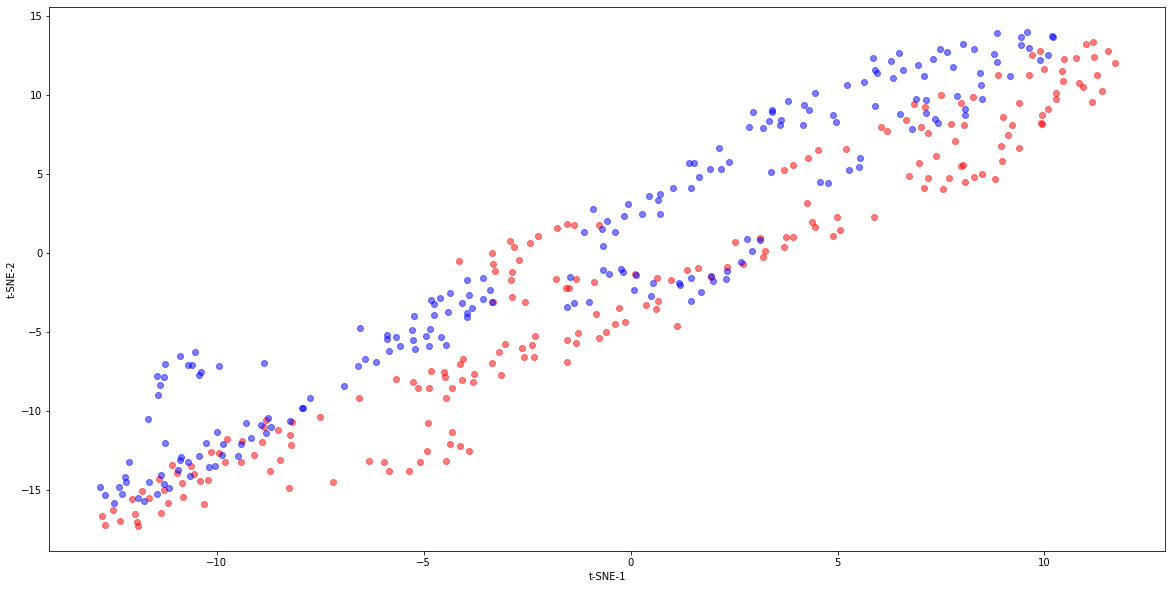

In [10]:
 from sklearn.manifold import TSNE
 view_true = TSNE(n_components=2, random_state=0).fit_transform(y_true)
 view_pred = TSNE(n_components=2, random_state=0).fit_transform(y_pred)
 #y_pred = y_pred.astype('int')
 plt.figure(figsize=(20,10))
 plt.scatter(view_true[:,0], view_true[:,1], c='r', alpha=0.5)
 plt.scatter(view_pred[:,0], view_pred[:,1], c='b', alpha=0.5)
 plt.xlabel('t-SNE-1')
 plt.ylabel('t-SNE-2')